In [1]:
# List the days needed as strings
import datetime as dt

format = "%Y-%m-%d"
##### 1.  2012-01-23
##### 2.  2012-02-07
##### 3.  2012-03-01
##### 4.  2012-03-07
##### 5.  2012-03-08
##### 6.  2012-03-13
##### 7.  2012-03-15
##### 8.  2012-04-03
##### 9.  2012-04-25
##### 10. 2012-07-06
##### 11. 2012-11-01
##### 12. 2012-11-07
days_to_analyze_string = ["2012-01-23", "2012-02-07", "2012-03-01", "2012-03-07", "2012-03-08", "2012-03-13", "2012-03-15", "2012-04-03", "2012-04-25", "2012-07-06", "2012-11-01", "2012-11-07"]

days_to_analyze = []

for day in days_to_analyze_string:
    day_datetime = dt.datetime.strptime(day, format)
    days_to_analyze.append(day_datetime)

print(days_to_analyze)

[datetime.datetime(2012, 1, 23, 0, 0), datetime.datetime(2012, 2, 7, 0, 0), datetime.datetime(2012, 3, 1, 0, 0), datetime.datetime(2012, 3, 7, 0, 0), datetime.datetime(2012, 3, 8, 0, 0), datetime.datetime(2012, 3, 13, 0, 0), datetime.datetime(2012, 3, 15, 0, 0), datetime.datetime(2012, 4, 3, 0, 0), datetime.datetime(2012, 4, 25, 0, 0), datetime.datetime(2012, 7, 6, 0, 0), datetime.datetime(2012, 11, 1, 0, 0), datetime.datetime(2012, 11, 7, 0, 0)]


## Riometer readfile:

In [2]:
import urllib.request

# define riometer readfile function
def rio_readfile(url):

    # Define lists
    date = [] #do i even need the date cause it's the same year?
    time = []
    absorption = []
    raw_sig = []

    # Define filename
    #filename = "RD 2012-03-03.txt"

    # open file to read
    response = urllib.request.urlopen(url)
    html_response = response.read()
    encoding = response.headers.get_content_charset("utf-8")
    fp = html_response.decode(encoding)

    # define new list sanitized_data
    # entry = [] list defined later, append datetime, absp, raw sig to it
    # later append entry to sanitized_data so it will be lists within a list
    sanitized_data = []
    
    for line in fp.splitlines():
        #print(line)
        #print(str(line))
    
        # skip comments
        if line[0] == "#":
            continue
        else:
            
            # strip line
            line_strip = line.strip()
            # split lines into lists
            line_split = line.split()
            #print(line_split[1])

            # Define datetime format for date and time
            
            format = "%d%m%Y%H:%M:%S"
            
            # split column 0 to month, date, year and make one row
            month = str(line_split[0].split("/")[1])
            day = str(line_split[0].split("/")[0])
            year = "20" + str(line_split[0].split("/")[2])
                      
            full_date = day + month + year + str(line_split[1])
            
            # Try-except to see if can convert to datetime
            try:
                res = bool(dt.datetime.strptime(full_date, format))
                this_time = dt.datetime.strptime(full_date, format)
                
                # Get rid of negative absorption values
                if float(line_split[2]) < 0:
                    continue
                # Only append line to list if time checks true

                # append time to array
                time.append(this_time)
                # append absorption to array
                absorption.append(float(line_split[2]))
                # append raw signals to array
                raw_sig.append(line_split[3])

                # define new list 
                entry = []
                entry.append(this_time)
                entry.append(line_split[2])
                entry.append(line_split[3])
                
                sanitized_data.append(entry)
                    
            except ValueError:
                res = False

    #return sanitized_data
    return sanitized_data
    #return absorption
    #return raw_sig

## Ionosonde readfile

In [3]:
## Import stuff
import numpy as np

def ionosonde_plotter(f):
    # Define timestamp array
    timestamp_full = []

    # Minimum virtual height of E trace
    sanitized_hE = []
    # Minimum virtual height of Es trace
    sanitized_hEs = []
    # Define CS array
    CS = []

    # E layer critical frequency
    sanitized_foE = []
    # Es layer critical frequency
    sanitized_foEs = []


    # Define filename MODIFIED FOR THIS CODE (All 12 days in one plot for avg absorption vs number of hEs or foEs points per hour)!!!!!!!!!!!!
    filename = f

    # define indices for each parameter of file
    time_idx = 0
    CS_idx = 1
    foEs_idx = 2
    foE_idx = 4
    hE_idx = 6
    hEs_idx = 8

    # Define format for datetime
    format = "%Y-%m-%dT%H:%M:%S.%fZ"

    # Open file - read
    fp = f
    # Read every line in file
    for line in fp:
    # Skip comments
        if line[0] == "#":
            continue
    # Strip lines
        else:
            line_strip = line.strip()
    # Split lines into lists
            line_split = line.split()

            foE_str = line_split[foE_idx]
            foEs_str = line_split[foEs_idx]
            hE_str = line_split[hE_idx]
            hEs_str = line_split[hEs_idx]

            timestamp_full.append(dt.datetime.strptime(line_split[time_idx], format))

            # Check if can convert foE to float
            try:
                foE_float = float(foE_str)
                # Extract timestamp and append to the array
                timestamp_str = line_split[time_idx]
                timestamp_datetime = dt.datetime.strptime(timestamp_str, format)
                sanitized_foE.append([timestamp_datetime, foE_float])
            except ValueError:
                # If the conversion fails, ignore the line
                pass

            # Check if can convert foEs to float
            try:
                foEs_float = float(foEs_str)
                # Extract timestamp and append to the array
                timestamp_str = line_split[time_idx]
                timestamp_datetime = dt.datetime.strptime(timestamp_str, format)
                sanitized_foEs.append([timestamp_datetime, foEs_float])
            except ValueError:
                # If the conversion fails, ignore the line
                pass

            # Check if hE can convert to float
            try:
                hE_float = float(hE_str)
                # Extract timestamp and append to the array
                timestamp_str = line_split[time_idx]
                timestamp_datetime = dt.datetime.strptime(timestamp_str, format)
                sanitized_hE.append([timestamp_datetime, hE_float])
            except ValueError:
                # If the conversion fails, ignore the line
                pass

            # Check if hEs can convert to float
            try:
                hEs_float = float(hEs_str)
                # Extract timestamp and append to the array
                timestamp_str = line_split[time_idx]
                timestamp_datetime = dt.datetime.strptime(timestamp_str, format)
                sanitized_hEs.append([timestamp_datetime, hEs_float])
            except ValueError:
                # If the conversion fails, ignore the line
                pass

    return sanitized_hEs, sanitized_foEs


## Number of pph PER DAY - foEs and hEs 

In [4]:
# define function to get points per hour PER DAY for hEs and foEs
def number_of_points(sanitized_data_var):
    #print(sanitized_data_var)
    #print("\n")
    points_per_hour = [] # list that gets returned
    current_hour = None
    points_count = 0 # points count

    for measurement in sanitized_data_var:
        if current_hour == None: # sets first ever list hour
            current_hour = int(measurement[0].hour)
        if int(measurement[0].hour) == current_hour: # separates each hour
            try:
                var_float = float(measurement[1])
                points_count += 1 # add to number of points per hour count for that hour
            except ValueError:
                continue
        else: # when moving on to the next hour
            points_per_hour.append([measurement[0].date(), current_hour, points_count]) # append last hour's data to pph list
            current_hour = int(measurement[0].hour) # set new hour
            try:
                var_float = float(measurement[1])
                points_count = 1 # set count to 1 because we're in the next hour's first list
            except ValueError:
                continue
    if points_count >= 1: # checks last ever hour
        points_per_hour.append([measurement[0].date(), current_hour, points_count])
    
    return points_per_hour # [0]: date, [1] hour, [2] #ofpoints

## Get # of pph for 12 UT days

In [5]:
import os
from collections import defaultdict


#default fict to hold plotting data key1 = date,hour  , key2 == pph OR abs

#outer dictionary
graph_plot_dict= defaultdict(lambda: {'hour': -1, 'pph_hEs': 0, 'pph_foEs' : 0, 'avg_absp': -1, 'peak_absp': -1})

pph_hEs_12days = []
pph_foEs_12days = []

directory = r"C:\Users\minod\OneDrive\Documents\UCalgary\Winter 2024\phys 598 - thesis\Jupyter files\Final paper\Riometer seasonal track\Trends\txt files"
for ionosonde_txt_file in os.listdir(directory):
    if ionosonde_txt_file.endswith(".txt"):
        with open(os.path.join(directory, ionosonde_txt_file)) as f:

            # get san data for each file
            sanitized_hEs, sanitized_foEs = ionosonde_plotter(f)

            #hEs
            
            # use pph function 
            points_per_hour_hEs = number_of_points(sanitized_hEs) # inner lists: [0]: date, [1]: hour, [2]: #ofpoints

            # hour: we're looping through 12 days, going through day by day. So hour
            #       in this case is hour 0-23 for the day we are looping through.
            #       Hour is a list - [0]: date, [1]: hour, [2]: #ofpoints
            for hour in points_per_hour_hEs:
                graph_plot_dict[f"{hour[0]}:{hour[1]}"]["pph_hEs"] = hour[2]
                graph_plot_dict[f"{hour[0]}:{hour[1]}"]["hour"] = hour[1]

            # not sure what this is used for?
            pph_hEs_12days.append(points_per_hour_hEs)

            # foEs

            # use pph function
            points_per_hour_foEs = number_of_points(sanitized_foEs)
            for hour in points_per_hour_foEs:
                graph_plot_dict[f"{hour[0]}:{hour[1]}"]["pph_foEs"] = hour[2]
            pph_foEs_12days.append(points_per_hour_foEs)

#print(pph_hEs_12days)
#print(graph_plot_dict)
            #print("\n")

## Average rio absorption per hour - all 12 days

In [6]:
#from datetime import datetime

import math

avg_absorption_list = []
# define base URL and base start/end year
base = "https://data.phys.ucalgary.ca/sort_by_project/GO-Canada/GO-Rio/txt/"

all_12_sanitized_data = []

# looping through each day
for date in days_to_analyze:
    current_hour = None
    measurement_count = 0
    absorption_total = None
    current_max = None

    year_str = str(date.year)
    month_str = str(date.month).zfill(2)
    day_str = str(date.day).zfill(2)

    # absolutely no reason to have this but whatever
    #sanitized_data_list_name = f"sanitized_data_{date.strftime("%Y%m%d")}"
    #globals()[sanitized_data_list_name] = sanitized_data
    #all_12_sanitized_data.append(sanitized_data)
    
    new_base = "https://data.phys.ucalgary.ca/sort_by_project/GO-Canada/GO-Rio/txt/{year}/{month}/{day}/norstar_k2_rio-daws_{year}{month}{day}_v01.txt"

    # get san data for rio file
    sanitized_data = rio_readfile(new_base.format(year=year_str, month=month_str, day=day_str))

    # for each list - [0]: datetime, [1]: absp value, [2]: raw signal
    for measurement in sanitized_data:
        # set first ever current_hour
        if current_hour == None:
            current_hour = int(measurement[0].hour)
            
        # if within the hour we are looking at
        if int(measurement[0].hour) == current_hour:
            try:
                absorption_value = float(measurement[1])
                if not math.isnan(absorption_value): # because NaN values get converted to math.isnan or something
                    if not current_max: # because first max of an hour is None so set that to max between absorptionval and 0
                        current_max = max(absorption_value,0)
                    else:
                        current_max = max(absorption_value, current_max)
                    # if there is no absp total yet, set it
                    if absorption_total == None: # absorption total can be None
                        absorption_total = absorption_value
                    else:
                        # sum
                        absorption_total += absorption_value

            except ValueError:
                pass
            measurement_count += 1
        else: # when the end of one hour comes
            if absorption_total: # if condition only if absorption value is not still None
                # append values of the hour we're looking at
                graph_plot_dict[f"{measurement[0].date()}:{current_hour}"]["avg_absp"] = absorption_total/measurement_count
                graph_plot_dict[f"{measurement[0].date()}:{current_hour}"]["peak_absp"] = current_max
                graph_plot_dict[f"{measurement[0].date()}:{current_hour}"]["hour"] = current_hour

                #avg_absorption_list.append([measurement[0].date(), current_hour, absorption_total/measurement_count, current_max])

            current_hour = int(measurement[0].hour) # set new hour
            # do the same absorption stuff again
            current_max = None
            try:
                if not math.isnan(float(measurement[1])):
                    absorption_total = float(measurement[1])
                    measurement_count = 1
            except ValueError:
                measurement_count = 0
                absorption_total = None
            

    if absorption_total:
        graph_plot_dict[f"{measurement[0].date()}:{current_hour}"]["avg_absp"] = absorption_total/measurement_count
        graph_plot_dict[f"{measurement[0].date()}:{current_hour}"]["peak_absp"] = current_max
        
        #avg_absorption_list.append([measurement[0].date(), current_hour, absorption_total/measurement_count, current_max])
        #avg_absorption_only.append(absorption_total/measurement_count)
#print(avg_absorption_list)
print(type(graph_plot_dict[1]["hour"]))

<class 'int'>


In [ ]:
print(graph_plot_dict)

# Average # of hEs/foEs points per hour

In [8]:
# don't need to append to the dictionary I made - cause idk how to make that work

# The dict has 12 days with 24 hours each - 12x24 elements
    # date:hour, pph_hEs, pph_hEs, avg_absp, peak_absp

# to get avg per hour from 12 days - can do:
    # for (i=0, i<=23, i++):
        # for date in days to analyze - convert to string: 
            # convert i to string
            # match up date:i_string - so go through hour 0 for all days, hour 1 for all days and so on
            # if date:istring:
                # sum and then get avg
                # append to dict or list - hour, avg_hEs, avg_foEs

hourly_avg = defaultdict(lambda: {"avg_absp":-2, "avg_hEs": 0, "avg_foEs": 0})


for i in range(0,24,1):
    sum_avg_hEs = 0
    sum_avg_foEs = 0
    sum_absp = 0
    count = 0
    
    for item in graph_plot_dict.items():
        if item[1]["hour"] == i:
            sum_avg_hEs += item[1]["pph_hEs"]
            sum_avg_foEs += item[1]["pph_foEs"]
            sum_absp += item[1]["avg_absp"]
            count += 1
    if count != 0:
        hourly_avg[i]["avg_foEs"] = sum_avg_foEs/count
        hourly_avg[i]["avg_hEs"] = sum_avg_hEs/count
        hourly_avg[i]["avg_absp"] = sum_absp/count

print(hourly_avg)
        

defaultdict(<function <lambda> at 0x0000018328D07420>, {0: {'avg_absp': 0.6152158817589404, 'avg_hEs': 2.6, 'avg_foEs': 2.6}, 1: {'avg_absp': 1.18716645365112, 'avg_hEs': 3.0, 'avg_foEs': 3.0}, 2: {'avg_absp': 0.8053576154459782, 'avg_hEs': 2.6666666666666665, 'avg_foEs': 2.6666666666666665}, 3: {'avg_absp': 0.8054825827622456, 'avg_hEs': 1.75, 'avg_foEs': 1.75}, 4: {'avg_absp': 0.21413166700267994, 'avg_hEs': 2.25, 'avg_foEs': 2.25}, 5: {'avg_absp': 0.308045447506182, 'avg_hEs': 3.25, 'avg_foEs': 3.25}, 6: {'avg_absp': 0.2457608508443834, 'avg_hEs': 4.0, 'avg_foEs': 4.0}, 7: {'avg_absp': 0.9702288443566306, 'avg_hEs': 3.0833333333333335, 'avg_foEs': 3.0833333333333335}, 8: {'avg_absp': 0.39557001091243094, 'avg_hEs': 3.8333333333333335, 'avg_foEs': 3.8333333333333335}, 9: {'avg_absp': 0.5396844161109614, 'avg_hEs': 5.083333333333333, 'avg_foEs': 5.083333333333333}, 10: {'avg_absp': 0.8117840228978981, 'avg_hEs': 4.416666666666667, 'avg_foEs': 4.416666666666667}, 11: {'avg_absp': 1.052

# Averages of pph_hEs for each absorption threshold

In [31]:
sumitem = 0
sumitem_foEs = 0
sumlen = 0
allavgs_hEs = []
allavgs_foEs = []
absorption_greaterthan = []

for i in range(0,6):
    for item in graph_plot_dict.items():
        if item[1]["avg_absp"] > i:
            if item[1]["pph_hEs"] < 25:
                sumitem += item[1]["pph_hEs"]
                sumitem_foEs += item[1]['pph_foEs']
                sumlen += 1
    allavgs_hEs.append(sumitem/sumlen)
    allavgs_foEs.append(sumitem_foEs/sumlen)
    sumitem=0
    sumitem_foEs = 0
    sumlen=0
    absorption_greaterthan.append(i)

print(allavgs_foEs)
print(absorption_greaterthan)
        

[3.5789473684210527, 3.2148760330578514, 3.2142857142857144, 3.1219512195121952, 3.2, 3.2777777777777777]
[0, 1, 2, 3, 4, 5]


# hEs/foEs vs avg_absp/peak_absp plot list

In [10]:
#pph_hEs avg_absp Plot List
import matplotlib.pyplot as plt

pph_hEs_list = []
pph_foEs_list = []
avg_absp_list = []
hour_list = []
peak_absp_list = []

colors = np.linspace(0, 1, 24)

for item in graph_plot_dict.items():
    #print (item[0])
    if item[1]["avg_absp"] != -1:
        pph_hEs_list.append(item[1]["pph_hEs"])
        pph_foEs_list.append(item[1]["pph_foEs"])
        avg_absp_list.append(item[1]["avg_absp"])
        peak_absp_list.append(item[1]["peak_absp"])
        hour_list.append(item[0].split(":")[1])


### Sampling frequency hEs / foEs points

In [11]:
# Python program to get average of a list 
def Average(needed_list): 
    return sum(needed_list) / len(needed_list) 

avg_numberOfPoints_hEs = Average(pph_hEs_list)
avg_numberOfPoints_foEs = Average(pph_foEs_list)

# Printing average of the list 
print("Average of the # of points recorded per hour for hEs =", avg_numberOfPoints_hEs)
print("Average of the # of points recorded per hour for foEs =", avg_numberOfPoints_foEs)

Average of the # of points recorded per hour for hEs = 3.6573426573426575
Average of the # of points recorded per hour for foEs = 3.6573426573426575


In [12]:
# avg hEs points
avg_hEs_vals = [item[1]["avg_hEs"] for item in hourly_avg.items()]
avg_foEs_vals = [item[1]["avg_foEs"] for item in hourly_avg.items()]
avg_absp_vals = [item[1]["avg_absp"] for item in hourly_avg.items()]
hours_list = [item[0] for item in hourly_avg.items()]

## hEs

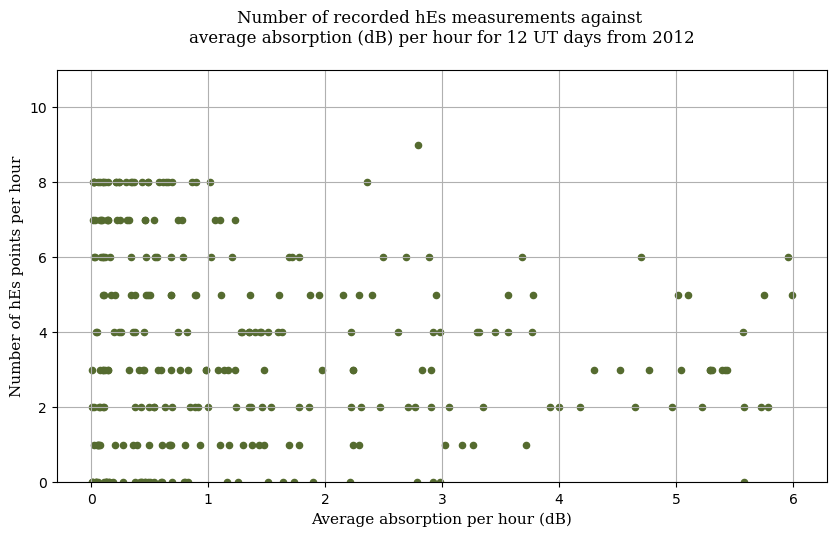

In [13]:
from matplotlib.cm import ScalarMappable

colors = [
    '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728',
    '#9467bd', '#8c564b']

plt.figure(figsize=(9,6))
plt.scatter(avg_absp_list, pph_hEs_list, s=20, color='darkolivegreen')
plt.xlabel("Average absorption per hour (dB)", fontdict={'family': 'serif', 'size': 11})
plt.ylabel("Number of hEs points per hour", fontdict={'family': 'serif', 'size': 11})
plt.title("Number of recorded hEs measurements against \naverage absorption (dB) per hour for 12 UT days from 2012", fontdict={'family': 'serif', 'size': 12}, pad=20)
plt.ylim(0,11)
plt.grid()
plt.tight_layout(pad=3.0)

#plt.scatter(absorption_greaterthan, allavgs_hEs, marker='*', s=200, c='red', label="Average hEs value for \neach absorption threshold")

# Add legend
#plt.legend(bbox_to_anchor=(0.7, 1), loc='upper left', prop={'family': 'serif', 'size': 9})

plt.savefig("hEs vs avg absorption, 12 UT days.png")
plt.show()
    

# For presentation - w/0 title

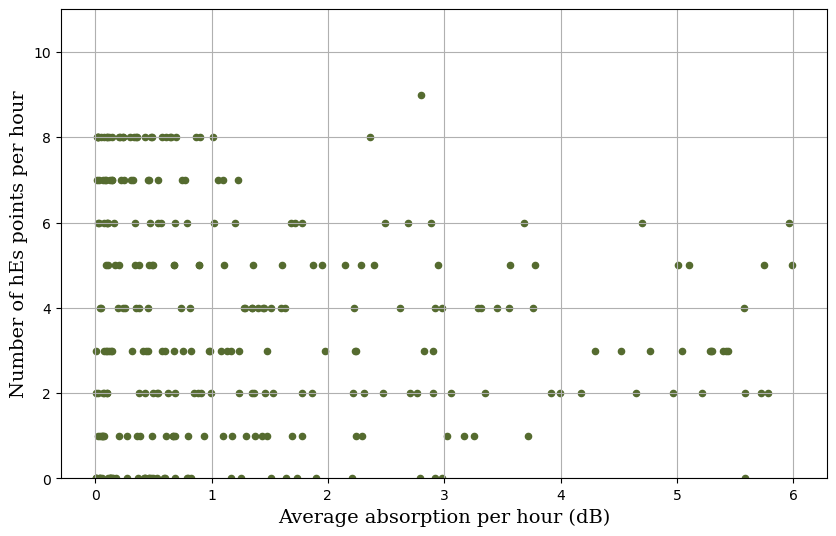

In [14]:
from matplotlib.cm import ScalarMappable

colors = [
    '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728',
    '#9467bd', '#8c564b']

plt.figure(figsize=(9,6))
plt.scatter(avg_absp_list, pph_hEs_list, s=20, color='darkolivegreen')
plt.xlabel("Average absorption per hour (dB)", fontdict={'family': 'serif', 'size': 14})
plt.ylabel("Number of hEs points per hour", fontdict={'family': 'serif', 'size': 14})
plt.ylim(0,11)
plt.grid()
plt.tight_layout(pad=3.0)

#plt.scatter(absorption_greaterthan, allavgs_hEs, marker='*', s=200, c='red', label="Average hEs value for \neach absorption threshold")

# Add legend
#plt.legend(bbox_to_anchor=(0.7, 1), loc='upper left', prop={'family': 'serif', 'size': 9})

plt.savefig("hEs vs avg absorption, 12 UT days_presentation.png")
plt.show()
    

# Probability of ionosonde functioning well as a function of absorption threshold --- 7 data points

In [71]:
# pph_hEs_list already cuts out pph hes values over 25
# now I need an array i guess for each absorption threshold:
    # like, 0-1, 1-2, 2-3, 3-4, 4-5, 5-6 (so 6 arrays)

# so i can go through i in a rang eof (0,6) where 0 represents threshold between 0-0.99 & 6 is threshold between 5-6


'''
sumitem = 0
sumitem_foEs = 0
sumlen = 0
allavgs_hEs = []
allavgs_foEs = []
absorption_greaterthan = []

for i in range(0,6):
    for item in graph_plot_dict.items():
        if item[1]["avg_absp"] > i:
            if item[1]["pph_hEs"] < 25:
                sumitem += item[1]["pph_hEs"]
                sumitem_foEs += item[1]['pph_foEs']
                sumlen += 1
    allavgs_hEs.append(sumitem/sumlen)
    allavgs_foEs.append(sumitem_foEs/sumlen)
    sumitem=0
    sumitem_foEs = 0
    sumlen=0
    absorption_greaterthan.append(i)

print(allavgs_foEs)
print(absorption_greaterthan)
        
'''
# define list where lists of pph vals for each absp threshold is stored
pph_per_abspThresh = []
temp_pph_list = []

for i in range(0,6):
    
    for item in graph_plot_dict.items():
        # define new list to append to
        if item[1]["avg_absp"] > i and item[1]["avg_absp"] <= i + 1: # so if absp value is > 0 but <= 1 etc.
            #print(item[1]["avg_absp"])
            if item[1]["pph_hEs"] < 25:
                temp_pph_list.append(item[1]["pph_hEs"])
        
    pph_per_abspThresh.append(temp_pph_list)
    #print(len(temp_pph_list))
    temp_pph_list = []

#print(pph_per_abspThresh)
#prob_data_pph_hEs = np.array(pph_hEs_list)


# say 7 data points means the ionosonde is functioning well.
# so to get the probability of the ionosonde funcitoning 

threshold_func = 7 # threshold for ionosonde functionality

# define probability storing list
probability_pph_hEs = []

# finding probability of each of the lists being 7
for list_perThresh in pph_per_abspThresh:
    list_perThresh = np.array(list_perThresh)
    probability = np.sum(list_perThresh >= threshold_func) / list_perThresh.size
    probability_pph_hEs.append(probability*100)

print(probability_pph_hEs)
print(absorption_greaterthan)

[27.439024390243905, 7.8431372549019605, 6.896551724137931, 0.0, 0.0, 0.0]
[0, 1, 2, 3, 4, 5]


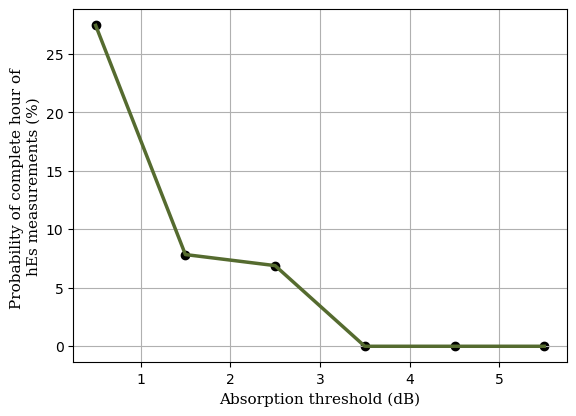

In [77]:
new_absp_thresh = [0.5, 1.5, 2.5, 3.5, 4.5, 5.5]

plt.scatter(new_absp_thresh, probability_pph_hEs, color='black')
plt.plot(new_absp_thresh, probability_pph_hEs, color='darkolivegreen', linewidth = 2.5)
plt.ylabel("Probability of complete hour of \nhEs measurements (%)", fontdict={'family': 'serif', 'size': 11})
plt.xlabel("Absorption threshold (dB)", fontdict={'family': 'serif', 'size': 11})
plt.tight_layout(pad = 3.0)
plt.grid(True)
plt.savefig("probability_ionosonde_functionality.png")
plt.show()

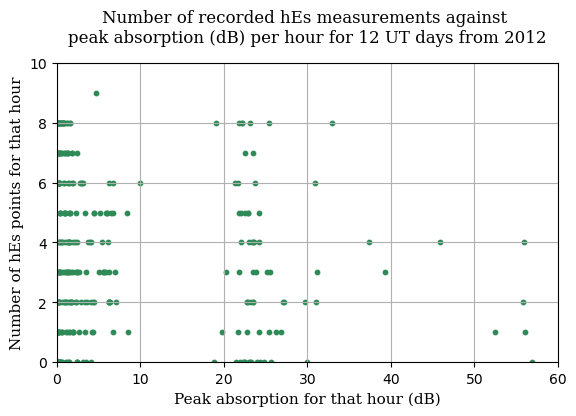

In [15]:
plt.scatter(peak_absp_list, pph_hEs_list, s=10, color='seagreen')
plt.xlabel("Peak absorption for that hour (dB)", fontdict={'family': 'serif', 'size': 11})
plt.ylabel("Number of hEs points for that hour", fontdict={'family': 'serif', 'size': 11})
plt.xlim(0,60)
plt.ylim(0,10)
plt.title("Number of recorded hEs measurements against \npeak absorption (dB) per hour for 12 UT days from 2012", fontdict={'family': 'serif', 'size': 12}, pad=15)
plt.tight_layout(pad=3.0)
plt.grid(True)
plt.savefig("hEs vs peak absorption, 12 UT days.png")
plt.show()
    

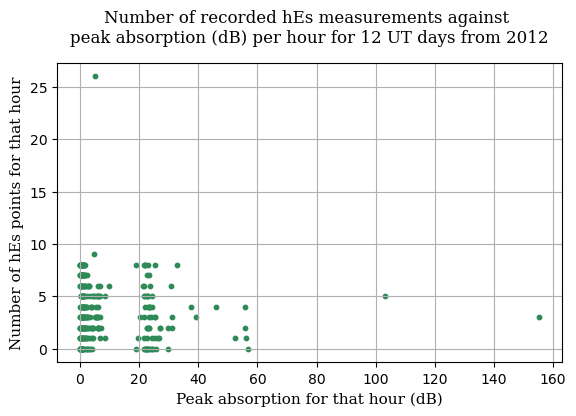

In [16]:
plt.scatter(peak_absp_list, pph_hEs_list, s=10, color='seagreen')
plt.xlabel("Peak absorption for that hour (dB)", fontdict={'family': 'serif', 'size': 11})
plt.ylabel("Number of hEs points for that hour", fontdict={'family': 'serif', 'size': 11})
plt.title("Number of recorded hEs measurements against \npeak absorption (dB) per hour for 12 UT days from 2012", fontdict={'family': 'serif', 'size': 12}, pad=15)
plt.tight_layout(pad=3.0)
plt.grid(True)
plt.savefig("uncut hEs vs peak absorption, 12 UT days.png")
plt.show()
    

## foEs

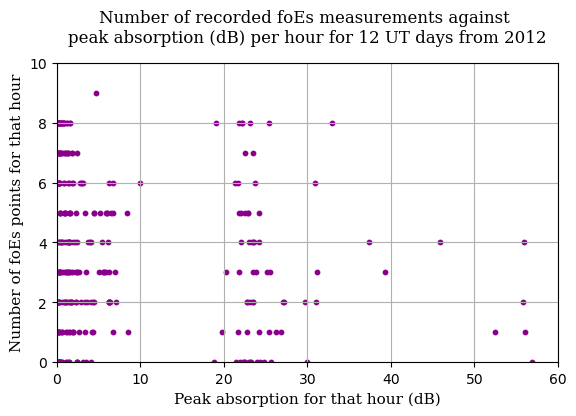

In [17]:
plt.scatter(peak_absp_list, pph_foEs_list, s=10, color='darkmagenta')
plt.xlabel("Peak absorption for that hour (dB)", fontdict={'family': 'serif', 'size': 11})
plt.ylabel("Number of foEs points for that hour", fontdict={'family': 'serif', 'size': 11})
plt.xlim(0,60)
plt.ylim(0,10)
plt.title("Number of recorded foEs measurements against \npeak absorption (dB) per hour for 12 UT days from 2012", fontdict={'family': 'serif', 'size': 12}, pad=15)
plt.tight_layout(pad=3.0)
plt.grid(True)
plt.savefig("foEs vs peak absorption, 12 UT days.png")
plt.show()
    

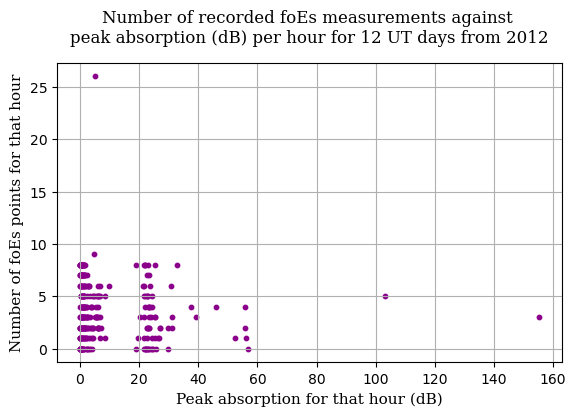

In [18]:
plt.scatter(peak_absp_list, pph_foEs_list, s=10, color='darkmagenta')
plt.xlabel("Peak absorption for that hour (dB)", fontdict={'family': 'serif', 'size': 11})
plt.ylabel("Number of foEs points for that hour", fontdict={'family': 'serif', 'size': 11})
#plt.xlim(0,60)
#plt.ylim(0,10)
plt.title("Number of recorded foEs measurements against \npeak absorption (dB) per hour for 12 UT days from 2012", fontdict={'family': 'serif', 'size': 12}, pad=15)
plt.tight_layout(pad=3.0)
plt.grid(True)
plt.savefig("Uncut foEs vs peak absorption, 12 UT days.png")
plt.show()
    

# For presentation - w/o title

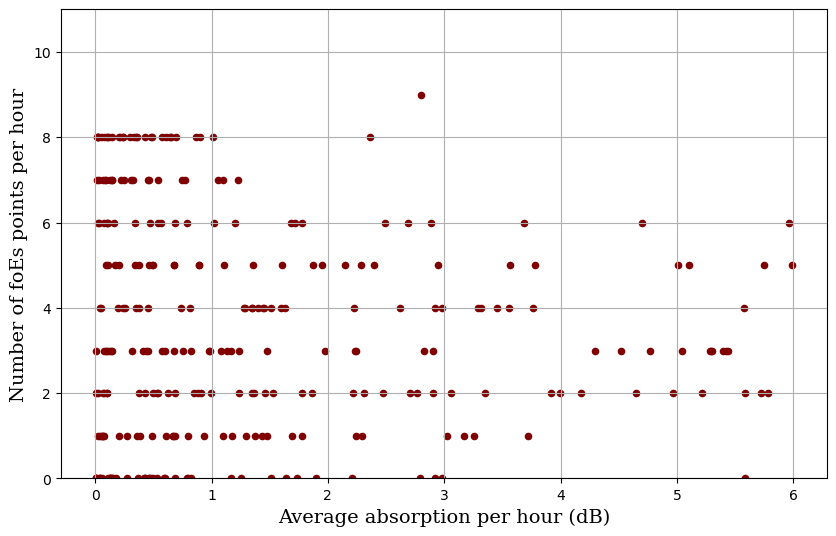

In [19]:
plt.figure(figsize=(9,6))
plt.scatter(avg_absp_list, pph_foEs_list, s=20, color='maroon')
plt.xlabel("Average absorption per hour (dB)", fontdict={'family': 'serif', 'size': 14})
plt.ylabel("Number of foEs points per hour", fontdict={'family': 'serif', 'size': 14})
#plt.title("Number of recorded foEs measurements against \naverage absorption (dB) per hour for 12 UT days from 2012", fontdict={'family': 'serif', 'size': 12}, pad=20)
plt.ylim(0,11)
plt.grid()
plt.tight_layout(pad=3.0)

#plt.scatter(absorption_greaterthan, allavgs_foEs, marker='*', s=200, c='blue', label="Average hEs value for \neach absorption threshold")

# Add legend
#plt.legend(bbox_to_anchor=(0.7, 1), loc='upper left', prop={'family': 'serif', 'size': 9})

plt.savefig("foEs vs avg absorption, 12 UT days_presentation.png")
plt.show()
    

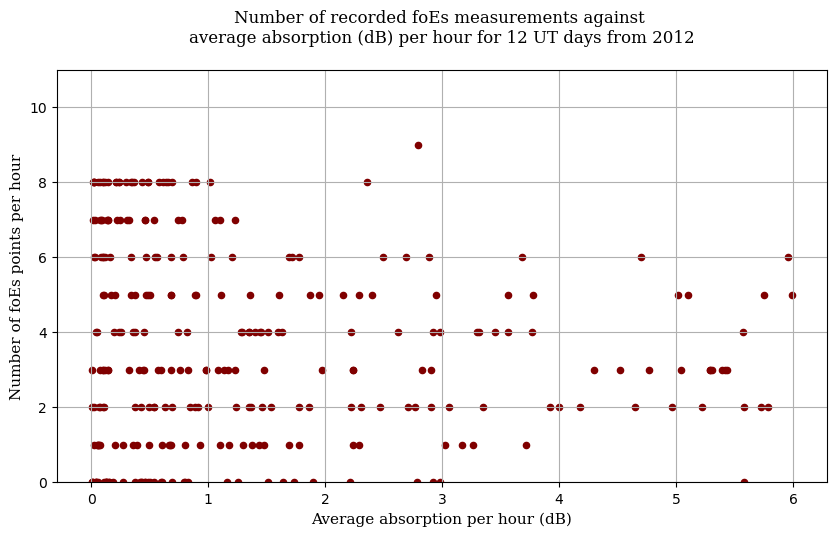

In [20]:
plt.figure(figsize=(9,6))
plt.scatter(avg_absp_list, pph_foEs_list, s=20, color='maroon')
plt.xlabel("Average absorption per hour (dB)", fontdict={'family': 'serif', 'size': 11})
plt.ylabel("Number of foEs points per hour", fontdict={'family': 'serif', 'size': 11})
plt.title("Number of recorded foEs measurements against \naverage absorption (dB) per hour for 12 UT days from 2012", fontdict={'family': 'serif', 'size': 12}, pad=20)
plt.ylim(0,11)
plt.grid()
plt.tight_layout(pad=3.0)

#plt.scatter(absorption_greaterthan, allavgs_foEs, marker='*', s=200, c='blue', label="Average hEs value for \neach absorption threshold")

# Add legend
#plt.legend(bbox_to_anchor=(0.7, 1), loc='upper left', prop={'family': 'serif', 'size': 9})

plt.savefig("foEs vs avg absorption, 12 UT days.png")
plt.show()
    

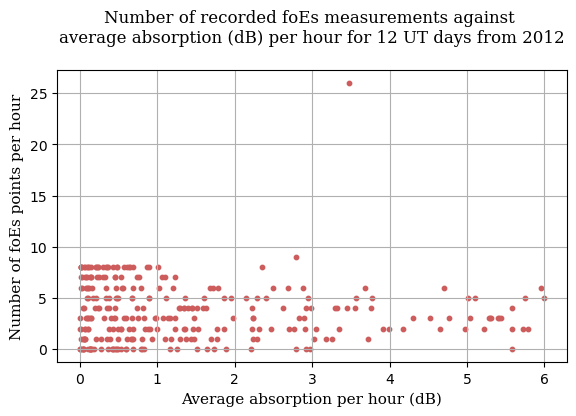

In [21]:
plt.scatter(avg_absp_list, pph_foEs_list, s=10, color='indianred')
plt.xlabel("Average absorption per hour (dB)", fontdict={'family': 'serif', 'size': 11})
plt.ylabel("Number of foEs points per hour", fontdict={'family': 'serif', 'size': 11})
plt.title("Number of recorded foEs measurements against \naverage absorption (dB) per hour for 12 UT days from 2012", fontdict={'family': 'serif', 'size': 12}, pad=20)
#plt.ylim(0,11)
plt.grid()
plt.tight_layout(pad=3.0)
plt.savefig("Uncut foEs vs avg absorption, 12 UT days.png")
plt.show()
    

# FOR ABSP > 2dB: hEs/foEs vs avg_absp/peak_absp plot list

In [22]:
#pph_hEs avg_absp Plot List
pph_hEs_list_Above2dB = []
pph_foEs_list_Above2dB = []
avg_absp_list_Above2dB = []
hour_list_Above2dB = []
#peak_absp_list_Above2dB = [] #chill on peak absp for now

colors = np.linspace(0, 1, 24)

for item in graph_plot_dict.items():
    if item[1]["avg_absp"] > 2:
        pph_hEs_list_Above2dB.append(item[1]["pph_hEs"])
        pph_foEs_list_Above2dB.append(item[1]["pph_foEs"])
        avg_absp_list_Above2dB.append(item[1]["avg_absp"])
        #peak_absp_list.append(item[1]["peak_absp"])
        hour_list_Above2dB.append(item[0].split(":")[1])


In [23]:
sampling_rate_2dBplus_hEs = Average(pph_hEs_list_Above2dB)
sampling_rate_2dBplus_foEs = Average(pph_foEs_list_Above2dB)

# Printing average of the list 
print("Average of the # of points recorded per hour for hEs for absorptions >2dB =", sampling_rate_2dBplus_hEs)
print("Average of the # of points recorded per hour for foEs for absorptions >2dB =", sampling_rate_2dBplus_foEs)

Average of the # of points recorded per hour for hEs for absorptions >2dB = 3.535211267605634
Average of the # of points recorded per hour for foEs for absorptions >2dB = 3.535211267605634


## hEs

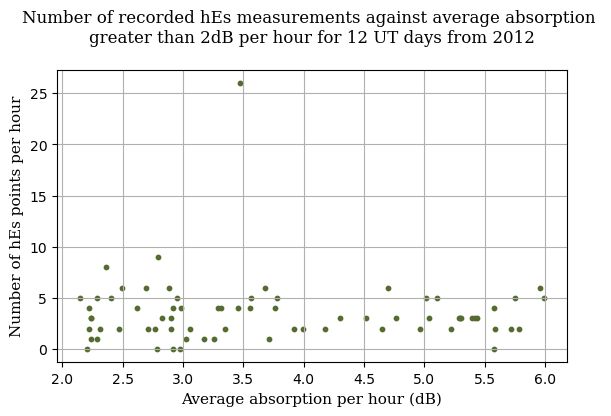

In [24]:
plt.scatter(avg_absp_list_Above2dB, pph_hEs_list_Above2dB, s=10, color='darkolivegreen')
plt.xlabel("Average absorption per hour (dB)", fontdict={'family': 'serif', 'size': 11})
plt.ylabel("Number of hEs points per hour", fontdict={'family': 'serif', 'size': 11})
plt.title("Number of recorded hEs measurements against average absorption \ngreater than 2dB per hour for 12 UT days from 2012", fontdict={'family': 'serif', 'size': 12}, pad=20)
#plt.ylim(0,11)
plt.grid()
plt.tight_layout(pad=3.0)
plt.savefig("Uncut greater than 2dB hEs vs avg absorption, 12 UT days.png")
plt.show()
    

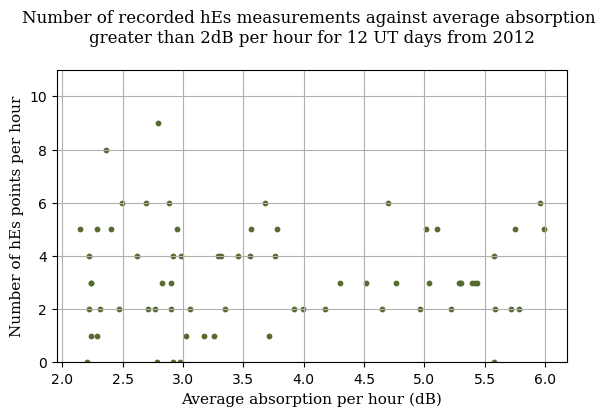

In [25]:
plt.scatter(avg_absp_list_Above2dB, pph_hEs_list_Above2dB, s=10, color='darkolivegreen')
plt.xlabel("Average absorption per hour (dB)", fontdict={'family': 'serif', 'size': 11})
plt.ylabel("Number of hEs points per hour", fontdict={'family': 'serif', 'size': 11})
plt.title("Number of recorded hEs measurements against average absorption \ngreater than 2dB per hour for 12 UT days from 2012", fontdict={'family': 'serif', 'size': 12}, pad=20)
plt.ylim(0,11)
plt.grid()
plt.tight_layout(pad=3.0)
plt.savefig("Greater than 2dB hEs vs avg absorption, 12 UT days.png")
plt.show()
    

## foEs

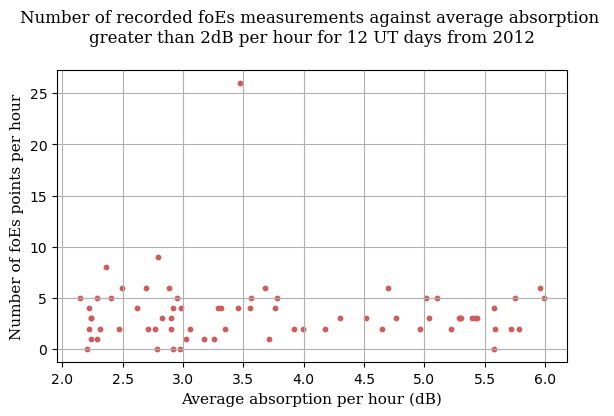

In [26]:
plt.scatter(avg_absp_list_Above2dB, pph_foEs_list_Above2dB, s=10, color='indianred')
plt.xlabel("Average absorption per hour (dB)", fontdict={'family': 'serif', 'size': 11})
plt.ylabel("Number of foEs points per hour", fontdict={'family': 'serif', 'size': 11})
plt.title("Number of recorded foEs measurements against average absorption \ngreater than 2dB per hour for 12 UT days from 2012", fontdict={'family': 'serif', 'size': 12}, pad=20)
#plt.ylim(0,11)
plt.grid()
plt.tight_layout(pad=3.0)
plt.savefig("Uncut greater than 2dB foEs vs avg absorption, 12 UT days.png")
plt.show()
    

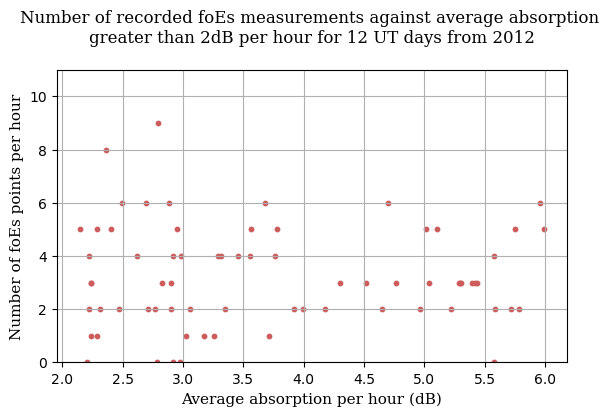

In [27]:
plt.scatter(avg_absp_list_Above2dB, pph_foEs_list_Above2dB, s=10, color='indianred')
plt.xlabel("Average absorption per hour (dB)", fontdict={'family': 'serif', 'size': 11})
plt.ylabel("Number of foEs points per hour", fontdict={'family': 'serif', 'size': 11})
plt.title("Number of recorded foEs measurements against average absorption \ngreater than 2dB per hour for 12 UT days from 2012", fontdict={'family': 'serif', 'size': 12}, pad=20)
plt.ylim(0,11)
plt.grid()
plt.tight_layout(pad=3.0)
plt.savefig("Greater than 2dB foEs vs avg absorption, 12 UT days.png")
plt.show()
    

In [29]:
print(absorption_greaterthan)

[0, 1, 2, 3, 4, 5]


In [28]:
plt.scatter(absorption_greaterthan, allavgs, color='maroon')
plt.plot(absorption_greaterthan, allavgs, color='navy', linestyle='-', linewidth=1)
plt.xlabel("Absorption threshold(dB)", fontdict={'family': 'serif', 'size': 11})
plt.ylabel("Sampling rate for number of hEs points recorded per hour", fontdict={'family': 'serif', 'size': 9})
plt.title("Sampling rates for number of hEs points recorded per hour \nagainst absorption threshold", fontdict={'family': 'serif', 'size': 12}, pad=20)
plt.tight_layout(pad=3.0)
plt.grid(True)
plt.show()

NameError: name 'allavgs' is not defined